In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

from tqdm.notebook import tqdm

In [2]:
###################
### Parameters ###
###################

###############
## FOR MODEL ##
###############

data = {
    'interest_rate' : 0.0025,
    'agents' : 500,
    'periods' : 1000,
    'runs' : 200
}

################
## FOR AGENTS ##
################
data.update({
       
    # Wealth distribution parameter: The higher, the lower the inequality
    "inequality_wealth" : 5, 

    # Skills distribution parameter: The higher, the lower the inequality
    "inequality_skills" : 3,
    "weight_gen_skills" : 0.5, # theta in the paper (Meritocracy)

    # Qualities and varieties parameters
    "qualities" : 20, # Q in the paper
    "varieties" : 10, # J in the paper

    # Own good pricing parameters
    "a" : 0.2, # a in the paper, that says it should be strictly larger than 0.
    "alpha" : 1.5, # alpha in the paper, that says it should be strictly larger than 1

    # Connectivity limits, parameters
    "min_connectivity" : 10,
    "max_connectivity" : 100, # int(data['agents']/2),

    # Propensity to consume parameters
    "pc_a" : 0.5, # a in the paper this a must be larger than 0.
    "pc_c_l" : 0.1, # paper's c_l must be greater than 0 and lower than c_h
    "pc_c_h" : 0.9, # paper's c_h must be larger than c_h but lower than 1.

    # Connectivity update parameters
    "connect_w" : 0.5, # w in the paper, must be >0, this reflects the importance of the change in wealth
    "connect_b" : 0.5, # b in the paper, must be >0, this reflects the importance of the moral behavior

    # Animal spirits parameters
    "as_gamma" : 0.5, # gamma constant in the paper that states it should be in (0,1). Represents the importance of mean reversion.
    "as_g" : 0.5, # g constant in the paper that states it should be in (0,1). Represents the importance of my friends.

    # Moral behavior parameters
    "mb_z" : 0.5, # constant z in the paper, reflects the influence of the peers, must be in (0,1)
    "mb_zeta" : 0.5, # constant greek zeta in the paper, must be in (0,1) and weight of mean reversion.

    # Political view parameters
    "pv_x" : 0.5, # constant x in the paper must be in (0,1) and reflects influence of peers
    "pv_omega" : 0.5 # constant omega in the paper must be in (0,1) reflects mean reversion
})

## Auxiliary Functions

In [3]:
#define function to calculate Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [4]:
from model import model

initial_ginis = []
final_ginis = []

tax = []

ag_political_view = []
ag_animal_spirits = []
ag_moral_behavior = []


for _ in tqdm(range(data['runs'])):    

    mymodel = model(data)

    for _ in range(data['periods']):
        mymodel.step()

    results_model = mymodel.datacollector.get_model_vars_dataframe()
    results_agents = mymodel.datacollector.get_agent_vars_dataframe()

    tax.append(results_model['tax'].mean())
    initial_ginis.append(gini(results_agents['wealth'].unstack().iloc[0,:]))
    final_ginis.append(gini(results_agents['wealth'].unstack().iloc[-1,:]))

  0%|          | 0/200 [00:00<?, ?it/s]

g:\My Drive\Work\Research\Economics\Ongoing\ABM Wealth\ABM-Project-ISCAL\virtenv\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


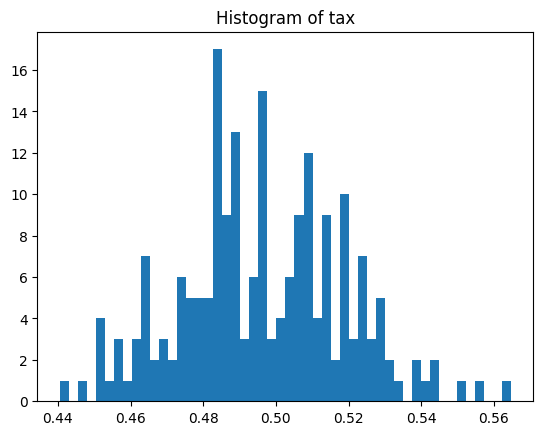

In [24]:
plt.hist(tax, bins = 50);
plt.title('Histogram of tax');

0.11110455510293299


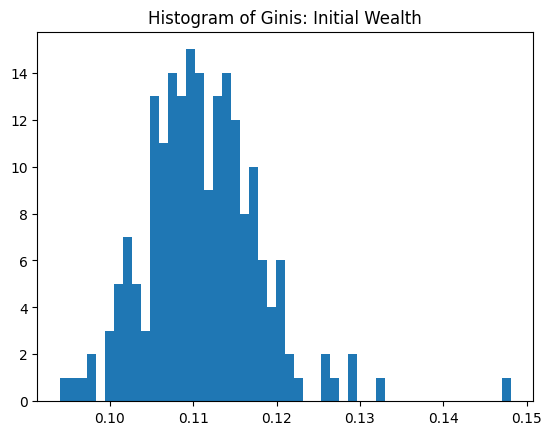

In [42]:
plt.hist(initial_ginis, bins = 50);
plt.title('Histogram of Ginis: Initial Wealth');
print(np.mean(initial_ginis))

0.04060183722042824


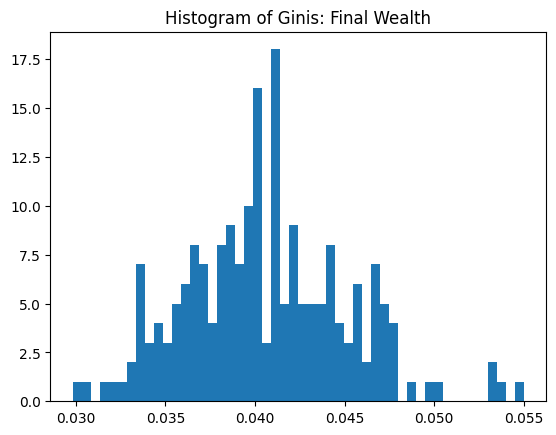

In [43]:
plt.hist(final_ginis, bins = 50);
plt.title('Histogram of Ginis: Final Wealth');
print(np.mean(final_ginis))

In [40]:
for k, v in {'Average Tax':tax, 'Initial Gini':initial_ginis, 'Final Gini':final_ginis}.items():
    l_sorted = v.copy()
    l_sorted = list(sorted(l_sorted))
    print(f'{str.title(k)} is between {np.round(l_sorted[5] * 100, 2)}% and {np.round(l_sorted[194] * 100 , 2)}%, with 95% confidence')



Average Tax is between 45.28% and 54.03%, with 95% confidence
Initial Gini is between 9.95% and 12.59%, with 95% confidence
Final Gini is between 3.32% and 4.99%, with 95% confidence
